# Regression Notebook

Made some illustrations for regression and using ridge and lasso regression for feature selection with toy data.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

## A Simple Regression Line

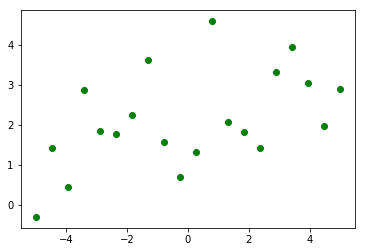

In [2]:
# make a plot illustrating a best fit line

x = np.linspace(-5,5,20)
true_y = 2 + 0.3*x
y = 2 + 0.3*x + np.random.normal(size = 20)
#plt.plot(x,true_y, color='r', alpha = 0.5)
plt.scatter(x,y, color='g')

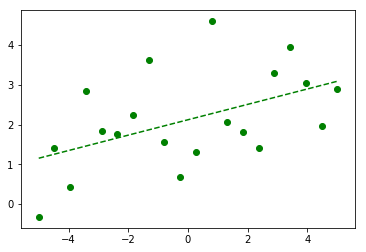

In [3]:
# use sklearn to do linreg


linreg = LinearRegression()
linreg.fit(x.reshape(-1,1),y)
yhat = linreg.predict(x.reshape(-1,1))
#plt.plot(x,true_y, alpha = 0.5, color='r', )
plt.plot(x,yhat, color='green', linestyle='--')
plt.scatter(x, y, color='green')
#plt.legend(['True Line', 'Regression Line'])

## Noisy Inputs = Bad

train noisy MSEs: 0.7138970453808575
train MSEs: 0.8137712393845407
var of train noisy MSE 0.14777321462791176
var of train MSE 0.1750992463955046

test noisy MSEs: 1.4185529584470131
test MSEs: 1.2263741444723
var of test noisy MSE 0.6354842268263303
var of test MSE 0.3618630746145767


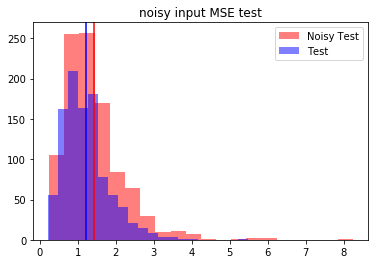

Text(0.5, 1.0, 'noisy input MSE train')

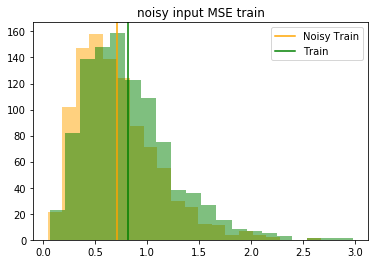

In [4]:
train_MSEs = []
train_MSEs_noisy = []

test_MSEs = []
test_MSEs_noisy = []

N = 10
for _ in range(1000):
    x_train_noisy = 10*np.random.rand(N,2)
    x_train = x_train_noisy[:,0]
    y_train = 3 + 2*x_train + np.random.normal(size = (N))
    
    x_test_noisy = 10*np.random.rand(N,2)
    x_test = x_test_noisy[:,0]
    y_test = 3 + 2*x_test + np.random.normal(size=(N))
    
    linreg.fit(x_train_noisy, y_train)
    
    yhat_train_noisy = linreg.predict(x_train_noisy)
    train_MSEs_noisy.append(MSE(y_train, yhat_train_noisy))
    
    yhat_test_noisy = linreg.predict(x_test_noisy)
    test_MSEs_noisy.append(MSE(y_test, yhat_test_noisy))

    linreg.fit(x_train.reshape(-1,1), y_train)
    
    yhat_train = linreg.predict(x_train.reshape(-1,1))
    train_MSEs.append(MSE(y_train, yhat_train))
    
    yhat_test = linreg.predict(x_test.reshape(-1,1))
    test_MSEs.append(MSE(y_test,yhat_test))
    
avg_noisy_train = sum(train_MSEs_noisy)/len(train_MSEs_noisy)
avg_train = sum(train_MSEs)/len(train_MSEs)

avg_noisy_test = sum(test_MSEs_noisy)/len(test_MSEs_noisy)
avg_test = sum(test_MSEs)/len(test_MSEs)
    
print('train noisy MSEs:', sum(train_MSEs_noisy)/len(train_MSEs_noisy))
print('train MSEs:', sum(train_MSEs)/len(train_MSEs))

print('var of train noisy MSE', sum((train_MSEs_noisy - avg_noisy_train)**2)/len(train_MSEs_noisy))
print('var of train MSE', sum((train_MSEs - avg_train)**2)/len(train_MSEs)) 

print()

print('test noisy MSEs:', avg_noisy_test)
print('test MSEs:', avg_test)

print('var of test noisy MSE', sum((test_MSEs_noisy - avg_noisy_test)**2)/len(test_MSEs_noisy))
print('var of test MSE', sum((test_MSEs - avg_test)**2)/len(test_MSEs))     

plt.hist(test_MSEs_noisy, bins=20, alpha=0.5, color='r')
plt.hist(test_MSEs, bins=20, alpha= 0.5, color='b')

plt.legend(['Noisy Test', 'Test'])
plt.title('noisy input MSE test')

plt.gca().axvline(sum(test_MSEs_noisy)/len(test_MSEs_noisy), color='r')
plt.gca().axvline(sum(test_MSEs)/len(test_MSEs), color='b')

plt.show()

plt.hist(train_MSEs_noisy, bins=20, alpha = 0.5, color='orange')
plt.hist(train_MSEs, bins=20, alpha = 0.5, color = 'g')

plt.gca().axvline(sum(train_MSEs_noisy)/len(train_MSEs_noisy), color='orange')
plt.gca().axvline(sum(train_MSEs)/len(train_MSEs), color='g')

plt.legend(['Noisy Train', 'Train'])
plt.title('noisy input MSE train')

## Linearly Dependent Features = Bad?

In [5]:
MSE_train_with3 = []
MSE_train_no3 = []
MSE_test_with3 = []
MSE_test_no3 = []

# stddev of error term in x3 = x1 + x2 + error
dep_noise = 1

for _ in range(100):
    N = 20
    X_train = 2*(np.random.rand(N,3)-0.5)
    X_train[:,2] = X_train[:,0] + X_train[:,1] + dep_noise*np.random.normal(size=(N))

    y_train = 10*X_train[:,0] - X_train[:,1] + 0.2*X_train[:,2] + np.random.normal(size=(N))

    linreg_with3 = LinearRegression()

    linreg_with3.fit(X_train, y_train)
    yhat_train_with3 = linreg_with3.predict(X_train)
    MSE_train_with3.append(MSE(yhat_train_with3, y_train))

    linreg_no3 = LinearRegression()

    linreg_no3.fit(X_train[:,:2], y_train)
    yhat_train_no3 = linreg_no3.predict(X_train[:,:2])
    MSE_train_no3.append(MSE(yhat_train_no3, y_train))


    X_test = 2*(np.random.rand(N,3)-0.5)
    X_test[:,2] = X_test[:,0] + X_test[:,1] + dep_noise*np.random.normal(size=(N))

    y_test = 10*X_test[:,0] - X_test[:,1] + 0.2*X_test[:,2] + np.random.normal(size=(N))

    MSE_test_with3.append(MSE(linreg_with3.predict(X_test), y_test))
    MSE_test_no3.append(MSE(linreg_no3.predict(X_test[:,:2]),y_test))

    
avg_MSE_train_with3 = sum(MSE_train_with3)/len(MSE_train_with3)
avg_MSE_train_no3 = sum(MSE_train_no3)/len(MSE_train_no3)
avg_MSE_test_with3 = sum(MSE_test_with3)/len(MSE_test_with3)
avg_MSE_test_no3 = sum(MSE_test_no3)/len(MSE_test_no3)


print('avg train MSE with x3', avg_MSE_train_with3)
print('avg train MSE wout x3', avg_MSE_train_no3)
print('avg test MSE with x3', avg_MSE_test_with3)
print('avg test MSE wout x3', avg_MSE_test_no3)




avg train MSE with x3 0.7685106058854599
avg train MSE wout x3 0.8663092172644205
avg test MSE with x3 1.2030226976222216
avg test MSE wout x3 1.1857146200451323


# Ridge Regression

In [323]:
def ridge(X_train, y_train, X_val, y_val, lambdas):
    # runs through ridge regression for the given lambda values
    # trains on X_train, y_train, recording MSE and coefs in a dict
    # validates on X_val, y_val and records in a dict
    
    # returns: above data, along with the valid lambdas and degrees of freedom information
    
    val_results = {}
    train_results = {}
    df_data = {}
    coef_results = {i:{} for i in range(X_train.shape[1])}
    valid_lambdas = []
    for lambduh in lambdas:
        try:
            
            XTX = np.dot(X_train.T, X_train)
            XTX_plus_lambda_inv = np.linalg.inv(XTX + lambduh*np.identity(XTX.shape[0]))
            beta_hat = np.dot(XTX_plus_lambda_inv, np.dot(X_train.T, y_train))

            y_hat_train = np.dot(X_train, beta_hat)
            train_results[lambduh] = MSE(y_hat_train, y_train)

            y_hat = np.dot(X_val, beta_hat)
            val_results[lambduh] = MSE(y_hat, y_val)

            # subtract 1 for intercept
            df_data[lambduh] = np.trace(np.dot(X_train, np.dot(XTX_plus_lambda_inv,X_train.T)))
            for i in range(X_train.shape[1]):
                coef_results[i][lambduh] = beta_hat[i]
            valid_lambdas.append(lambduh)
        except np.linalg.LinAlgError:
            print('Singular matrix for lambda', lambduh)
    return val_results, df_data, train_results, coef_results, valid_lambdas

def ridge_get_beta(X,y, lambduh):
    XTX = np.dot(X.T, X)
    XTX_plus_lambda_inv = np.linalg.inv(XTX + lambduh*np.identity(XTX.shape[0]))
    beta_hat = np.dot(XTX_plus_lambda_inv, np.dot(X.T, y))
    for colname, coef in zip(X.columns, beta_hat):
        print(colname, coef)
    return beta_hat

def plot_ridge(results, df_data, train_results, coef_results, lambdas, legend= True):
    errors = []
    train_errors = []
    
    for lambduh in lambdas:
        errors.append(np.array(results[lambduh]).mean())
        train_errors.append(np.array(train_results[lambduh]).mean())
        
    plt.plot(lambdas, errors)
    plt.plot(lambdas, train_errors)
    plt.legend(['val','train'])
    plt.xlabel('lambda')
    plt.ylabel('avg MSE')
    
    plt.show()
    
    coef_avg = {i:[] for i in coef_results.keys()}
    
    for i in coef_results.keys():
        for lambduh in lambdas:
            coef_avg[i].append(np.array(coef_results[i][lambduh]).mean())
    for i in coef_avg.keys():    
        plt.scatter(lambdas, coef_avg[i])
    plt.title('coefficients')
    if legend:
        plt.legend(coef_results.keys())
    plt.hlines(0, xmin = min(lambdas), xmax = max(lambdas), linestyle='--')
    plt.show()
    
    
    dfs = []
    errors = []
    lambdas = []
    for lambduh in results.keys():
        for i in range(len(results[lambduh])):
            dfs.append(df_data[lambduh][i])
            errors.append(results[lambduh][i])
            lambdas.append(lambduh)
    plt.scatter(dfs,errors)
    plt.xlabel('degrees of freedom')
    plt.ylabel('val error')
    plt.title('DoF vs error for all samples')
    
    plt.show()
    
    plt.scatter(dfs,lambdas)
    plt.xlabel('degrees of freedom')
    plt.ylabel('lambda')
    plt.title('DoF vs lambda for all samples')
    plt.show()
            


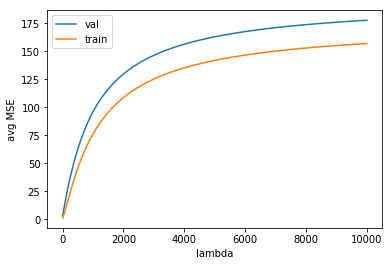

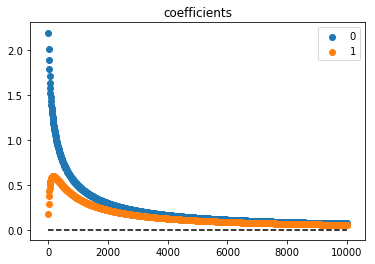

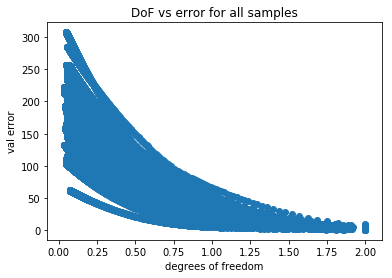

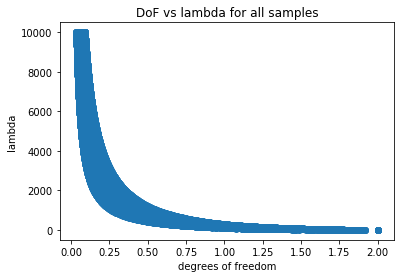

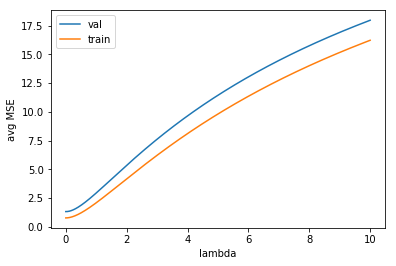

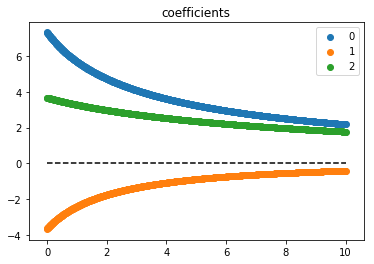

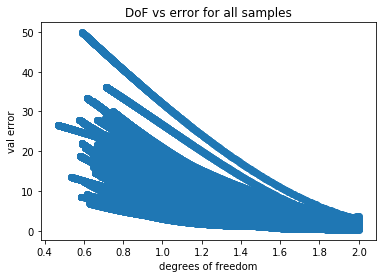

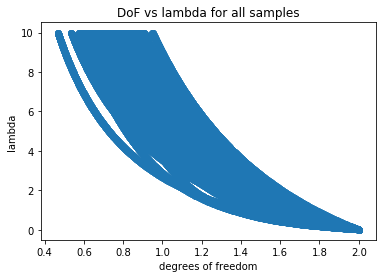

In [333]:
from collections import defaultdict

np.random.seed(42)    
N = 10  
p=2
start = 0
stop = 10000
nsteps = 1000
lambdas = np.linspace(start, stop, nsteps)
val_results_net = defaultdict(list)
df_data_net = defaultdict(list)
train_results_net = defaultdict(list)
coef_results_net = {i:defaultdict(list) for i in range(p)}

for _ in range(100):
    x_train_noisy = 10*np.random.rand(N,p)
    x_train = x_train_noisy[:,0]-0.5
    y_train = 3 + 2*x_train + np.random.normal(size = (N))

    x_test_noisy = 10*np.random.rand(N,p)
    x_test = x_test_noisy[:,0]
    y_test = 3 + 2*x_test + np.random.normal(size=(N))
    
    val_results, df_data, train_results, coef_results, valid_lambdas \
    = ridge(x_train_noisy, y_train, x_test_noisy, y_test, lambdas)
    
    for lambduh in valid_lambdas:
        val_results_net[lambduh].append(val_results[lambduh])
        df_data_net[lambduh].append(df_data[lambduh])
        train_results_net[lambduh].append(train_results[lambduh])
        for i in range(p):
            coef_results_net[i][lambduh].append(coef_results[i][lambduh])
        
    
plot_ridge(val_results_net,
          df_data_net,
          train_results_net,
          coef_results_net,
          np.linspace(start, stop, nsteps))

p=3
dep_noise = 0


start = 0.001
stop = 10
n_steps = 1000
val_results_net = defaultdict(list)
df_data_net = defaultdict(list)
train_results_net = defaultdict(list)
coef_results_net = {i:defaultdict(list) for i in range(p)}

lambdas = np.linspace(start, stop, n_steps)
for _ in range(100):
    
    X_train = 2*(np.random.rand(N,p)-0.5)
    X_train[:,2] = X_train[:,0] + X_train[:,1] + dep_noise*np.random.normal(size=(N))
    y_train = 10*X_train[:,0] - X_train[:,1] + X_train[:,2] + np.random.normal(size=(N))

    X_test = 2*(np.random.rand(N,p)-0.5)
    X_test[:,2] = X_test[:,0] + X_test[:,1] + dep_noise*np.random.normal(size=(N))
    y_test = 10*X_test[:,0] - X_test[:,1] + X_test[:,2] + np.random.normal(size=(N))
    
    val_results, df_data, train_results, coef_results, valid_lambdas \
    = ridge(X_train, y_train, X_test, y_test, lambdas)
    
    for lambduh in valid_lambdas:
        val_results_net[lambduh].append(val_results[lambduh])
        df_data_net[lambduh].append(df_data[lambduh])
        train_results_net[lambduh].append(train_results[lambduh])
        for i in range(p):
            coef_results_net[i][lambduh].append(coef_results[i][lambduh])


plot_ridge(val_results_net,
          df_data_net,
          train_results_net,
          coef_results_net,
          np.linspace(start, stop, nsteps))




[[ 1.00000000e+00 -1.38777878e-17  1.38777878e-17 -2.77555756e-16
   1.04083409e-16  8.32667268e-17 -6.24500451e-17 -1.11022302e-16
  -6.33174069e-17]
 [-1.38777878e-17  1.00000000e+00  1.52655666e-16 -1.52655666e-16
   1.11022302e-16 -8.32667268e-17 -2.84494650e-16  5.55111512e-17
  -1.50053581e-16]
 [ 1.38777878e-17  1.52655666e-16  1.00000000e+00 -4.16333634e-17
   4.16333634e-17 -1.80411242e-16 -3.46944695e-18  1.66533454e-16
   5.00467723e-16]
 [-2.77555756e-16 -1.52655666e-16 -4.16333634e-17  1.00000000e+00
   5.48172618e-16 -1.94289029e-16  2.08166817e-17  8.32667268e-17
   1.76941795e-16]
 [ 1.04083409e-16  1.11022302e-16  4.16333634e-17  5.48172618e-16
   1.00000000e+00  3.81639165e-16  3.43475248e-16  2.77555756e-17
   2.37223435e-16]
 [ 8.32667268e-17 -8.32667268e-17 -1.80411242e-16 -1.94289029e-16
   3.81639165e-16  1.00000000e+00  1.76941795e-16 -4.16333634e-16
  -3.98119038e-16]
 [-6.24500451e-17 -2.84494650e-16 -3.46944695e-18  2.08166817e-17
   3.43475248e-16  1.7694179

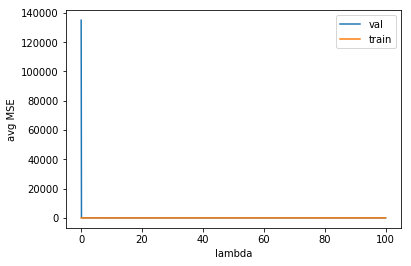

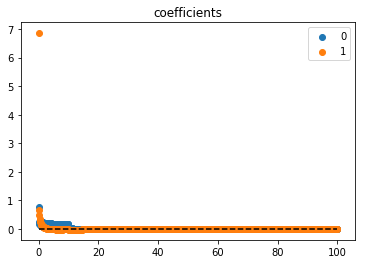

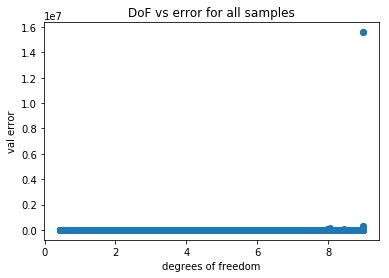

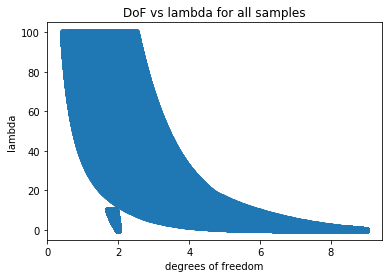

In [304]:
# orthonormal data

np.random.seed(42)
start = 0
stop = 100
n_steps = 1000
lambdas = np.linspace(start, stop, n_steps)

beta_true = np.random.normal(size=9)

# get a "random" orthogonal matrix
M = np.random.normal(size=(9,9))
u, s, vh = np.linalg.svd(M)

print(np.dot(u.T, u))

for i in range(100):
    print('{}/10'.format(i))
    X_train = np.diag(np.array(list(range(1,10)))*np.random.normal(size=9))
    X_train = np.dot(u, X_train)
    y_train = np.dot(beta_true, X_train) + np.random.normal(size=9)

    X_test = np.diag(np.array(list(range(1,10)))*np.random.normal(size=9))
    X_test = np.dot(u, X_test)
    y_test = np.dot(beta_true, X_test)+ np.random.normal(size=9)

    val_results, df_data, train_results, coef_results, valid_lambdas \
    = ridge(X_train, y_train, X_test, y_test, lambdas)
    
    for lambduh in valid_lambdas:
        val_results_net[lambduh].append(val_results[lambduh])
        df_data_net[lambduh].append(df_data[lambduh])
        train_results_net[lambduh].append(train_results[lambduh])
        for i in range(p):
            coef_results_net[i][lambduh].append(coef_results[i][lambduh])
            
plot_ridge(val_results_net,
          df_data_net,
          train_results_net,
          coef_results_net,
          valid_lambdas)


In [284]:
import numpy as np

tiny_number = 0.00001
np.random.seed(0)

def lasso(X, y, X_val, y_val, verbose = False):
    # assume that the features are standardized
    N = X.shape[0]
    Xmean = X.mean()
    Xstd = X.std()
    X = (X - X.mean())/X.std()
    
    X_val = (X_val - Xmean)/Xstd
    
    features = [col for col in X.columns if col != 'intercept']
    r = y - y.mean()
    
    p = len(features)
    
    active_set = set()
    inactive_set = set(features)
    
    X[features] = (X[features] - X[features].mean())/X[features].std()
    
    beta = pd.Series(0, index = features)
    
    coef_tracker = {feature: [0] for feature in features}
    l1_tracker = [0]
    rss_tracker = [np.linalg.norm(r)/N]
    rss_val_tracker = [MSE(y_val, y.mean()+np.zeros(y_val.shape))]
    
    adding_new = True
    while len(active_set) < p:
        if verbose:
            print('\n********** LASSO ROUND {} **********'.format(len(active_set)+1))
            
        if (r*r).sum() < tiny_number:
            print('Halting for stability reasons; residual small')
            break
    
        
        corrs = X[features].apply(lambda col: col*r).sum()/(r*r).sum()
        
        if verbose:
            print('\nCorrelations with residual are...')
            print(corrs[list(active_set)])
            print(corrs[list(inactive_set)])
        
        # depending on how the last run ended, we had...
        # a zero coefficient becoming nonzero
        # a nonzero coefficient becomine zero
        # the flag indicates which case we're in and computes the active set
        if adding_new:
            corrs = corrs.abs()

            best_feature = corrs[list(inactive_set)].idxmax()

            if verbose:
                print('\nAdding', best_feature)
            active_set.add(best_feature)
            inactive_set.remove(best_feature)
        else:
            if verbose:
                print('\nRemoving', feature_hit_zero)
            active_set.remove(feature_hit_zero)
            inactive_set.add(feature_hit_zero)
        
        if verbose:
            print('\nActive set: {}'.format(active_set))

        # freeze the order of the active set for a moment
        active_set_list = list(active_set)

        X_active = X[active_set_list].to_numpy()

        XTX = np.dot(X_active.T, X_active)
        XTXinv = np.linalg.inv(XTX)
        delta_numpy = np.dot(XTXinv, np.dot(X_active.T, r.to_numpy()))
        delta_active = pd.Series(delta_numpy, index=active_set_list)
        delta = pd.Series(0, index = features)
        delta[active_set_list] = delta_active

        helper = np.dot(X_active, delta_numpy)

        if verbose:
            print('\nWe will increase coefficients at the rate...')
            print(delta)

        if len(active_set) < p:
            # in this case, we shrink to make the residual correlation of the active
            # set hit the highest in the inactive set
            if verbose:
                print('\nTarget values of alpha are...')

            if verbose:
                print('(+)')
            col_diffs = X[inactive_set].subtract(X[best_feature], axis=0)
            alpha_targets = col_diffs.apply(lambda col:col*r).sum()/col_diffs.apply(lambda col:col*helper).sum()
            try:
                best_feature_plus = alpha_targets[alpha_targets > tiny_number].idxmin()
                alpha_plus = alpha_targets[best_feature_plus]
            except:
                alpha_plus = np.inf
            if verbose:
                print(alpha_targets)

            if verbose:
                print('(-)')
            col_diffs = X[inactive_set].subtract(-X[best_feature], axis=0)
            alpha_targets = col_diffs.apply(lambda col:col*r).sum()/col_diffs.apply(lambda col:col*helper).sum()
            try:
                best_feature_minus = alpha_targets[alpha_targets > tiny_number].idxmin()
                alpha_minus = alpha_targets[best_feature_minus]
            except:
                alpha_minus = np.inf
            if verbose:
                print(alpha_targets)
            
            if verbose:
                print('0 for actives')
            
            alpha_targets = -beta/delta
            try:
                best_feature_zero = alpha_targets[alpha_targets > tiny_number].idxmin()
                alpha_zero = alpha_targets[best_feature_zero]
            except:
                alpha_zero = np.inf
            if verbose:
                print(alpha_targets)

            alpha = min(alpha_plus, alpha_minus, alpha_zero)
            
            # if a feature hits zero coef, set the flag to calculate the delta without it
            if alpha_zero == alpha:
                feature_hit_zero = best_feature_zero
                adding_new = False
            else:
                adding_new = True
        else:
            # now all variables are active, so kill correlation with residual
            
            alpha = (X[best_feature]*r).sum()/(X[best_feature]*helper).sum()
            
        
        if verbose:
            print('\nTaking alpha = ', alpha)
            print('\nUpdating coeffs to...')
        
        beta += alpha*delta
        r -= alpha*helper
        
        if verbose:
            print(beta)
        
        # update the lists that make the graph
        for feature in coef_tracker.keys():
            coef_tracker[feature].append(beta[feature]/Xstd[feature])
        l1_tracker.append(l1_tracker[-1]+alpha*np.linalg.norm(delta))
        rss_tracker.append(np.linalg.norm(r)/N)
        rss_val_tracker.append(MSE(y_val, y.mean() + np.dot(X_val.to_numpy(), beta)))
    
    return coef_tracker, l1_tracker, rss_tracker, rss_val_tracker
    
def plot_lasso(coef_tracker, l1_tracker, rss_tracker, rss_val_tracker, legend=True):
    keys = coef_tracker.keys()
    for feature in keys:
        plt.plot(l1_tracker, coef_tracker[feature])
    plt.xlabel('L1 arc length')
    plt.ylabel('coefficient')
    if legend:
        plt.legend(keys)
    plt.title('lasso coefficient paths')
    plt.show()
    
    plt.plot(l1_tracker, rss_tracker)
    plt.plot(l1_tracker, rss_val_tracker)
    plt.legend(['train','val'])
    plt.xlabel('L1 arc length')
    plt.ylabel('RSS')
    plt.title('RSS as coeffs change')
    plt.show()
    


    
    


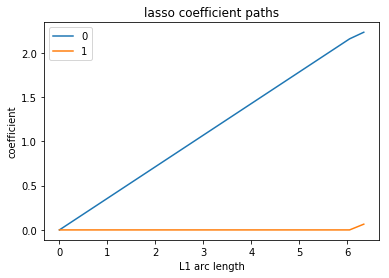

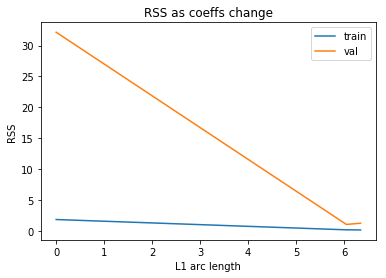

In [290]:
import pandas as pd

np.random.seed(42)
p=2
x_train_noisy = 10*np.random.rand(N,p)
x_train = x_train_noisy[:,0]
y_train = 3 + 2*x_train + np.random.normal(size = (N))

x_test_noisy = 10*np.random.rand(N,p)
x_test = x_test_noisy[:,0]
y_test = 3 + 2*x_test + np.random.normal(size=(N))

x_train_df = pd.DataFrame(x_train_noisy, columns=list(range(x_train_noisy.shape[1])))
y_train_df = pd.Series(y_train)

x_test_df = pd.DataFrame(x_test_noisy, columns=list(range(x_test_noisy.shape[1])))
y_test_df = pd.Series(y_test)

plot_lasso(*lasso(x_train_df, y_train_df, x_test_df, y_test_df))
    

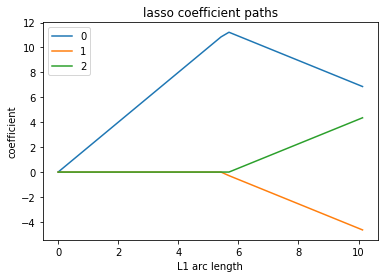

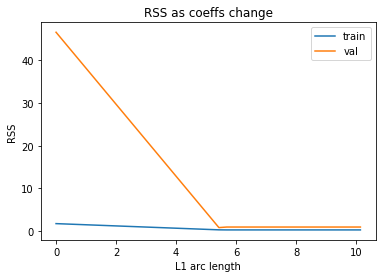

In [291]:
np.random.seed(42)
p=3
X_train = 2*(np.random.rand(N,p)-0.5)
X_train[:,2] = X_train[:,0] + X_train[:,1] + dep_noise*np.random.normal(size=(N))
y_train = 10*X_train[:,0] - X_train[:,1] + X_train[:,2] + np.random.normal(size=(N))

X_test = 2*(np.random.rand(N,p)-0.5)
X_test[:,2] = X_test[:,0] + X_test[:,1] + dep_noise*np.random.normal(size=(N))
y_test = 10*X_test[:,0] - X_test[:,1] + X_test[:,2] + np.random.normal(size=(N))

x_train_df = pd.DataFrame(X_train, columns=list(range(X_train.shape[1])))
y_train_df = pd.Series(y_train)

x_test_df = pd.DataFrame(X_test, columns=list(range(X_test.shape[1])))
y_test_df = pd.Series(y_test)

plot_lasso(*lasso(x_train_df, y_train_df, x_test_df, y_test_df))

10

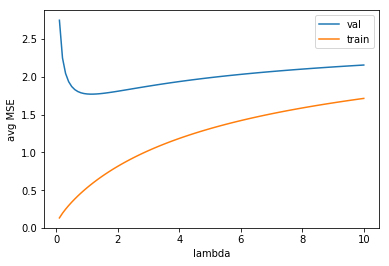

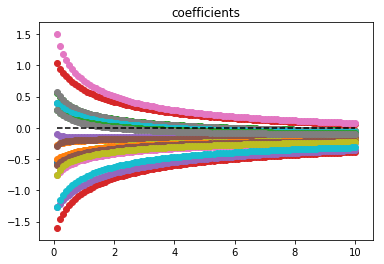

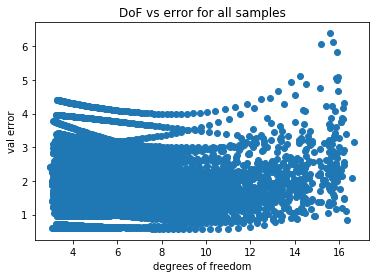

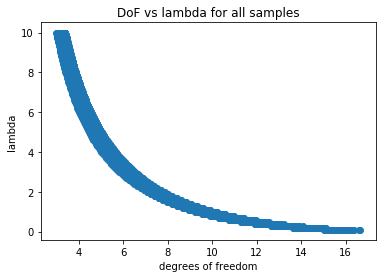

In [332]:
from collections import defaultdict

np.random.seed(42)    
N = 20
p= 20
start = 0.1
stop = 10
nsteps = 100
lambdas = np.linspace(start, stop, nsteps)
val_results_net = defaultdict(list)
df_data_net = defaultdict(list)
train_results_net = defaultdict(list)
coef_results_net = {i:defaultdict(list) for i in range(p)}
beta_true = np.random.normal(size=p)

for _ in range(100):
    x_test = np.random.rand(N,p)
    y_test = np.dot(x_test,beta_true ) + np.random.normal(size = (N))

    x_train = np.random.rand(N,p)
    y_train = np.dot(x_train, beta_true) + np.random.normal(size = (N))

    
    val_results, df_data, train_results, coef_results, valid_lambdas \
    = ridge(x_train, y_train, x_test, y_test, lambdas)
    
    for lambduh in valid_lambdas:
        val_results_net[lambduh].append(val_results[lambduh])
        df_data_net[lambduh].append(df_data[lambduh])
        train_results_net[lambduh].append(train_results[lambduh])
        for i in range(p):
            coef_results_net[i][lambduh].append(coef_results[i][lambduh])
        
    
plot_ridge(val_results_net,
          df_data_net,
          train_results_net,
          coef_results_net,
          np.linspace(start, stop, nsteps), legend=False)



